# Requirements

In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

# 1D diffusion

Particles can move in 1D on a discrete grid of coordinates, i.e., coordinates that have only integer values.  A particle has equal probability ($1/2$) to move either to the left or to the right.

In [2]:
def diffuse_particle(t_max, x0=0):
    return x0 + sum(random.choices([-1, 1], k=t_max))

The function above simulates a single particle.  However, there are many particles in the system.

In [3]:
def simulation(nr_particles, t_max, x0=0):
    return [diffuse_particle(t_max, x0) for _ in range(nr_particles)]

In [4]:
data = simulation(10_000, 500)

We can use `plt.hist` to display the data, however, that may lead to artefacts.

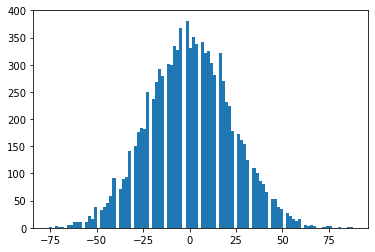

In [5]:
_ = plt.hist(data, bins=100)

The simulation below has particles starting at two positions, -50 and 50.

In [6]:
data = simulation(20000, 500, -50) + simulation(20000, 500, 50)

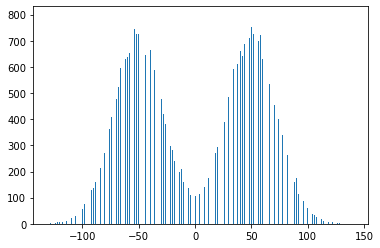

In [7]:
_ = plt.hist(data, bins=501)

To ensure that a bin contains only the data for a single position, define the bins by hand.  The first value is the first bin's left edge, the last value is the last bin's right edge.

In [8]:
def show_distribution(data, density=False):
    x_min, x_max = min(data), max(data)
    bins = x_max - x_min + 1
    bins = [x_min - 0.5] + [x + 0.5 for x in range(x_min, x_max + 1)]
    _ = plt.hist(data, bins=bins, density=density)

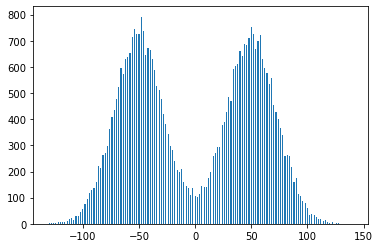

In [9]:
show_distribution(data)

The distribution can also be interpreted as a probability distribution by normalizing it.

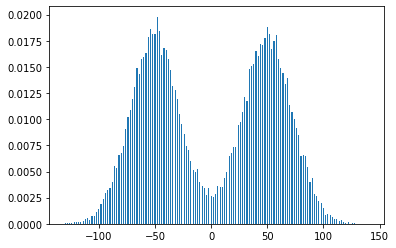

In [10]:
show_distribution(data, density=True)

# 2D diffusion

The same process can be considered in 2D.  We can visualize the movement of the particles over time.

In [11]:
def diffuse_particle_2d(t, x0=0, y0=0):
    return (
        x0 + sum(random.choices([-1, 1], k=t)),
        y0 + sum(random.choices([-1, 1], k=t))
    )

In [12]:
@interact(t=(0, 20, 1))
def show_2d_diffusion(t):
    random.seed(1234) # for consistency between time points
    particles = [diffuse_particle_2d(t) for _ in range(4)]
    symbols = ['or', 'og', 'ob', 'oy']
    for particle, symbol in zip(particles, symbols):
        plt.plot([particle[0]], [particle[1]], symbol, alpha=0.6, )
    plt.gca().set_aspect('equal')
    plt.xlim(-20.0, 20.0)
    _ = plt.ylim(-20.0, 20.0)

interactive(children=(IntSlider(value=10, description='t', max=20), Output()), _dom_classes=('widget-interact'…

In [13]:
def simulation_2d(nr_particles, t_max, x0=0, y0=0):
    return [diffuse_particle_2d(t_max, x0) for _ in range(nr_particles)]

In [14]:
data = simulation_2d(10_000, 500)

In [15]:
def show_distribution_2d(data):
    transposed = list(zip(*data))
    _ = plt.plot(transposed[0], transposed[1], 'o', alpha=0.1)
    plt.gca().set_aspect('equal')

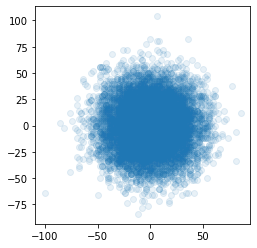

In [16]:
show_distribution_2d(data)

In [17]:
x_data, y_data = map(list, zip(*data))

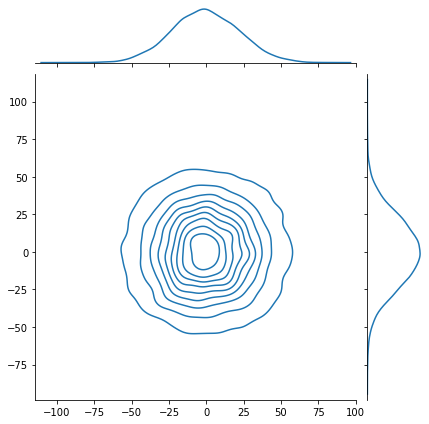

In [18]:
_ = sns.jointplot(x=x_data, y=y_data, kind='kde')